# Question 1

A) Calculate the expected return and correlation matrix of the stock, bond and HY bond returns. <br>
B) Given this set of scenarios, what are the portfolio weights that achieve the lowest volatility while keeping the expected portfolio return above 6%. <br>
C) What’s the 95% VaR and CVaR of the portfolio calculated above? What’s the probability that the drawdown of the portfolio is bigger than 10% over the next 1-year period?


In [89]:
import pandas as pd
import os
import numpy as np
os.chdir(r'C:\Users\nazne\Downloads\RussuleInvesment')
os.getcwd()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [90]:
df_original = pd.read_csv('5Y_Scenario_File.txt', delimiter = ",")
df_original.head()

,Global Equity UH,U.S. Core Fixed Income,Global High Yield H
0,-0.108474,0.038446,0.093814
1,-0.027712,-0.014179,0.032102
2,0.370239,0.024327,0.077355
3,-0.035772,0.002683,0.044717
4,0.211969,0.023330,0.089939


In [91]:
df_original.tail()

,Global Equity UH,U.S. Core Fixed Income,Global High Yield H
24995,-0.095024,-0.006504,-0.000925
24996,0.144532,0.056720,0.064148
24997,0.058800,-0.005640,0.016703
24998,0.189712,0.032590,0.075196
24999,0.165362,-0.009849,-0.040397


In [92]:
### period data
period_data = {}
period = 1
for i in range(0,df_original.shape[0],5000):
    period_data["time_period_" + str(period)] = df_original.iloc[i:i+5000, :]
   # print(i)
    period = period+1

In [93]:
period_data.keys()

dict_keys(['time_period_1', 'time_period_2', 'time_period_3', 'time_period_4', 'time_period_5'])

In [94]:
for key,val in period_data.items():
    val.reset_index(drop =True, inplace= True)
    val['Scenarios'] = "Scenario" + (val.index +1).astype(str)
    print(val.head(2))

   Global Equity UH  U.S. Core Fixed Income  Global High Yield H  Scenarios
0         -0.108474                0.038446             0.093814  Scenario1
1         -0.027712               -0.014179             0.032102  Scenario2
   Global Equity UH  U.S. Core Fixed Income  Global High Yield H  Scenarios
0          0.022493               -0.004840             0.030325  Scenario1
1         -0.066488                0.031613             0.046563  Scenario2
   Global Equity UH  U.S. Core Fixed Income  Global High Yield H  Scenarios
0          0.079193                0.113924             0.101947  Scenario1
1         -0.261660               -0.129987            -0.065073  Scenario2
   Global Equity UH  U.S. Core Fixed Income  Global High Yield H  Scenarios
0          0.033158               -0.023436             0.019359  Scenario1
1          0.122668                0.097173             0.051287  Scenario2
   Global Equity UH  U.S. Core Fixed Income  Global High Yield H  Scenarios
0         -0

## Expected Returns
For each time period there 5000 scenario, lets suppose each scenario is equally likely to occur,
then probability of a scenario $1,....5000$ is $1/5000$, based on this, the expected return on each period will be defined as, 
$$ E(returns) = p(i)*\sum \limits _{j=1} ^{5000} return_i $$

In [95]:
df_return1 = pd.DataFrame()
for key,val in period_data.items():
    expected_returns = val.iloc[:,:3].sum()*100/val.shape[0]
    temp = pd.DataFrame(expected_returns, columns = [key + " (in %)"])
    df_return1 = pd.concat([df_return1,temp], axis=1)
df_return1['Return in 5 periods (in %)'] = df_return1.sum(axis=1)
df_return1.round(2)

,time_period_1 (in %),time_period_2 (in %),time_period_3 (in %),time_period_4 (in %),time_period_5 (in %),Return in 5 periods (in %)
Global Equity UH,7.70,8.12,7.77,7.94,8.06,39.60
U.S. Core Fixed Income,0.52,0.99,1.58,2.12,2.62,7.83
Global High Yield H,3.10,3.53,4.13,4.77,5.14,20.68


Actually, if we change our thought process of scenarios and think that a scenario will occur in all the 5 time periods. then our definition of return over 5 time periods will change as it will be scenario driven. But the expected retuns value will still be same. 

In [96]:
df_return2 = pd.DataFrame(columns= val.columns[:3])
for key, val in period_data.items():
    val.set_index('Scenarios', inplace=True)
    df_return2 = df_return2.add(val.iloc[:,:3], fill_value =0)

In [97]:
df_return2 = df_return2*100
display(df_return2)

,Global Equity UH,U.S. Core Fixed Income,Global High Yield H
Scenarios,,,
Scenario1,1.0167,7.104,1.4169
Scenario2,12.6214,12.932,35.7702
Scenario3,60.9426,4.3451,18.633
Scenario4,64.336,12.9498,26.8494
Scenario5,70.5305,7.0467,29.1009
...,...,...,...
Scenario4996,-24.086,6.1995,16.0962
Scenario4997,53.4062,14.2142,29.715
Scenario4998,4.8958,4.5026,20.8822


In [98]:
print("expected Returns for the three assest class in 5 time periods")
pd.DataFrame(df_return2.sum()/df_return2.shape[0], columns = ['Expected return (in %)'])

expected Returns for the three assest class in 5 time periods


,Expected return (in %)
Global Equity UH,39.598036
U.S. Core Fixed Income,7.828301
Global High Yield H,20.680225


## Correlation Matrix
Pearson's correlation is used to measure the linear relationship between the variables. We can look at the cross sectional correlation between the asset classes in each time period and also over the whole time period of length five how the behaved wrt each other. Below we look at the correlation between the full data considering each scenario as different data point.

,Global Equity UH,U.S. Core Fixed Income,Global High Yield H
Global Equity UH,1.00,0.24,0.38
U.S. Core Fixed Income,0.24,1.00,0.66
Global High Yield H,0.38,0.66,1.00


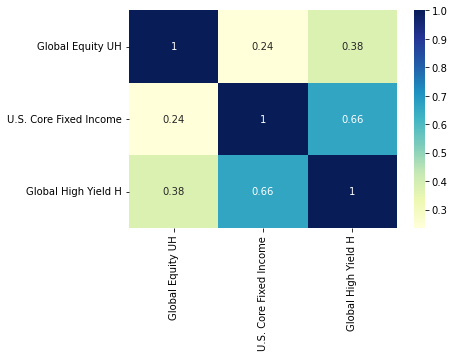

In [103]:
# import modules 
import matplotlib.pyplot as mp 
import pandas as pd 
import seaborn as sb 

display(df_original.corr().round(2)) 
  
# plotting correlation heatmap 
dataplot = sb.heatmap(df_original.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show()

In [108]:
df_cov = df_original.cov().round(2)*252 ## annulised portfolio volatility
df_cov["Expected return (in %)"] = df_return2.sum()/df_return2.shape[0]
df_cov

,Global Equity UH,U.S. Core Fixed Income,Global High Yield H,Expected return (in %)
Global Equity UH,7.56,0.0,2.52,39.598036
U.S. Core Fixed Income,0.00,0.0,0.00,7.828301
Global High Yield H,2.52,0.0,2.52,20.680225


Although there is an a way to get minimum variance portfolio using efficient frontier which is discussed in the two links (https://www.simtrade.fr/blog_simtrade/minimum-volatility-portfolio/)
(https://www.codecademy.com/resources/docs/markdown/links) <br>
But from the naked eye,you can easily see that US core Fixed Income have zero volatitily and no correlation with the other two classes. Also it has expected return greater than 6%. so, we can simply keep only this fixed income asset in our portfolio.

In [113]:
import numpy as np
import scipy.stats as stats

# Calculate the mean and standard deviation of the returns
mean = df_original["U.S. Core Fixed Income"].mean()
std = df_original["U.S. Core Fixed Income"].std()*np.sqrt(252)

# Set the confidence level
confidence_level = 0.95

# Calculate the VaR
VaR = stats.norm.ppf(confidence_level, mean, std)

# Print the VaR
print("The VaR is", VaR)

## formula to calculate VaR = mean - z/std 

The VaR is 1.370675051832165


In [117]:
sorted_data = df_original.sort_values(by = ["U.S. Core Fixed Income"])
num_samples = df_original.shape[0]
cvar_index = int((1 - confidence_level) * num_samples)
print(cvar_index)
cvar = np.mean(sorted_data.loc[:cvar_index, "U.S. Core Fixed Income"])
# Print CVaR result
print(f"CVaR at {confidence_level*100}% confidence level: {cvar}")

1250
CVaR at 95.0% confidence level: -0.007860908472344186


In [120]:
## probability of drawdowns
dd_df = sorted_data[sorted_data["U.S. Core Fixed Income"] < -.01]
dd_df.head()

,Global Equity UH,U.S. Core Fixed Income,Global High Yield H
11673,-0.534603,-0.196799,-0.352539
10739,-0.149813,-0.188383,-0.296164
9749,0.088598,-0.187731,-0.095723
18908,-0.371155,-0.186467,-0.163062
4620,-0.431845,-0.185935,-0.372888


In [122]:
prob = dd_df.shape[0]/sorted_data.shape[0]
print("probability of drawdown greater than 10% in next 1 year based on historic data :", prob)

probability of drawdown greater than 10% in next 1 year based on historic data : 0.3074


Seems like there is no risk in investing the U.S. Core Fixed Income so all the values CVaR (shortfall) and probability of drawdown bigger than 10% is zero.

# Question 2
You have been tasked to oversee improvements in the design of a multi-asset strategy. You have a set of capital market assumptions for different asset classes to which the portfolio already allocates. However, the portfolio manager of the strategy thinks there should be broader exposures in the portfolio where you don’t have capital market assumptions. In particular, she thinks there should be allocations to **gold, collateralized loan obligations (CLOs), convertible bonds and volatility strategies**. Describe your plan (not more than 1 page) to evaluate if these types of strategies/ assets should be used in the strategic allocation and how you would determine the weight to the assets. Assume that your work sets the strategic asset allocation for a multi-asset strategy fund that serves many institutional clients, targeting a return of cash plus 4%. 

Note- We do not want you to look at actual data to make a determination. We want you to write-up your approach for how you would go about solving the problem.


# Solution

**The formula for portfolio volatility is:**
$$\sigma_{portfolio} = \sqrt{w^T.\sum.w}$$

$\sigma_{portfolio}$ **:** Portfolio volatility <br>
$\sum$ **:** Covariance matrix of returns <br>
$w^T$ **:** Portfolio weights (is transposed portfolio weights) <br>
$\cdot$ **:** The dot-multiplication operator <br>

**The formula for expected returns of the portfolio**
$$w*R_{matrix}$$

Capital markets include:
1. Primary market: The market for new shares or securities
2. Secondary market: The exchange of securities among investors
3. Derivatives market: The market where financial instruments like options, futures, and swaps are bought and sold
4. Commodities markets: Places where commodities are traded
5. Stock market: A particular category of the capital market that only trades shares of corporations

* Gold and bonds is considered as good options for headging startegies due to their negative correlation wrt to stock market securities.
* A collateralized loan obligation (CLO) is a single security backed by a pool of debt. Collateralized loan obligations (CLO) are often backed by corporate loans with low credit ratings or loans taken out by private equity firms to conduct leveraged buyouts. These have investment grade rating based on the quality or risk measures of the underlying loans.
* A convertible bond is a hybrid security that offers both debt- and equity-like features. Convertible bonds are issued as corporate bonds, but have a slightly lower interest rate. They are a fixed-income security that can be converted into common stock shares or cashed in for cash of equal value.


Based on the risk appetite of the client, we can play with the weights allocated to the assets to reach to the desired returns. According to my view having securities in the portfolio which have low or negative correlation helps in maintaining expected return level in adverse scenarios. While gold, convertible bond and volatility strategies are good way to hedge as in case stock market performs is down, gold and bonds will return better than stocks. If Stock market is doing well investor can convert their bond to equities to get better returns. CLOs are a bit tricky as they often driven by the economies as well new wave in the markets. Loans have high risk of insolvency and that's why I would like to little more research before suggesting them as additional security in the portfolio.

Using weight correlation value for assest class can one way of allocating weights to the portfolio to reach expected returns. 
$$ weight_{asset_i} = expected return * \frac {correlation_{asset_i} }{ \sum _{i} ^k correlation_{assest_i} }$$